<a href="https://colab.research.google.com/github/sanji-krishna-MP/ML-project_1-Diabetes-prediction-/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing depencencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape


(768, 9)

In [ ]:
### HANDLING IMBALANCED DATASET(Imbalanced Dataset)

In [ ]:
df.isnull().sum()  #There is no missing values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
##seeing the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
def unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")
        print()

In [ ]:
unique_values(df)

Unique values in column 'Pregnancies': [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Unique values in column 'Glucose': [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

Unique values in column 'BloodPressure': [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

Unique values in column 'SkinThickness': [35 29  0 23 32 45 19 47 38 30 41 33 26 15 

In [ ]:
df.value_counts('Outcome') #("Handling the imbalanced dataset")

,count
Outcome,
0,500
1,268


In [ ]:
#dependent and independent features

x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
###Appling smote to handle the imbalanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)


In [ ]:
y_resampled.value_counts() ##result after smote

,count
Outcome,
1,500
0,500


In [ ]:
###spliting to training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

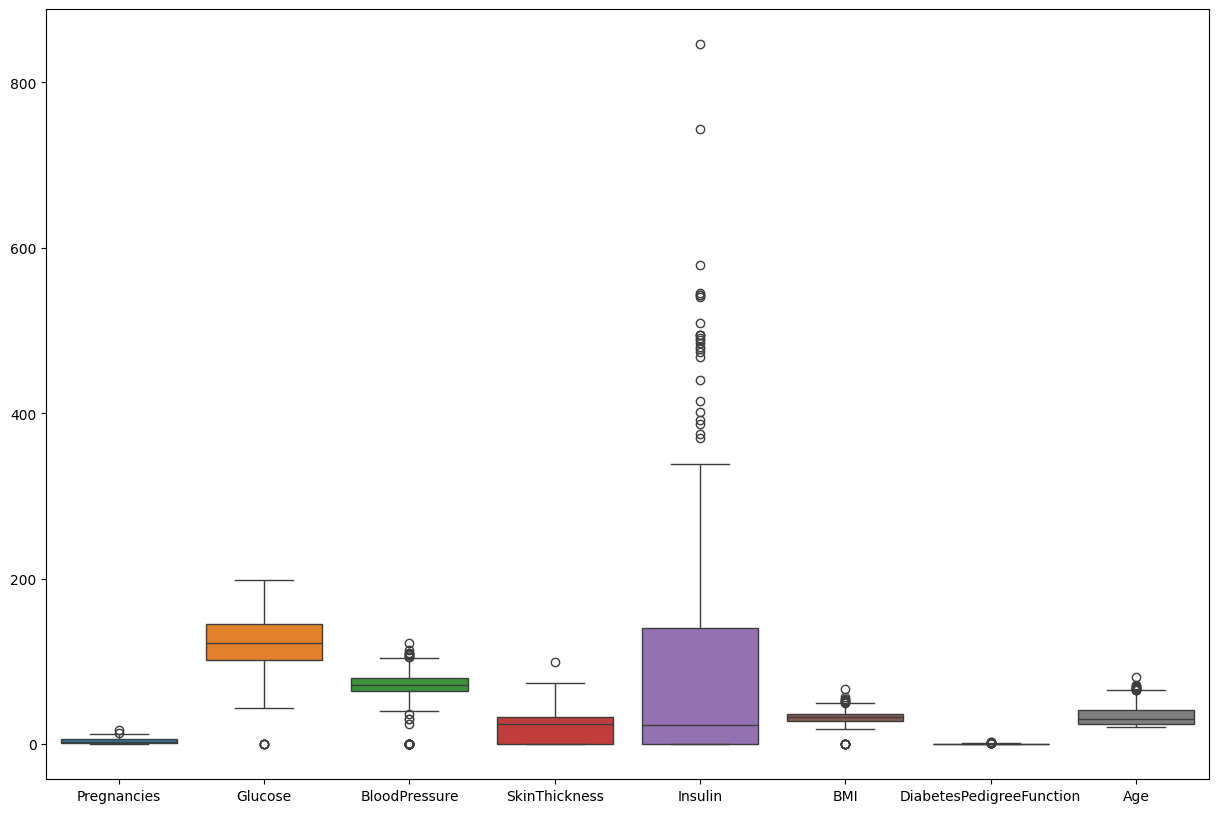

In [ ]:
##visialisation with boxplot(before standardisation)
plt.figure(figsize=(15, 10))
sns.boxplot(data=x_train)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

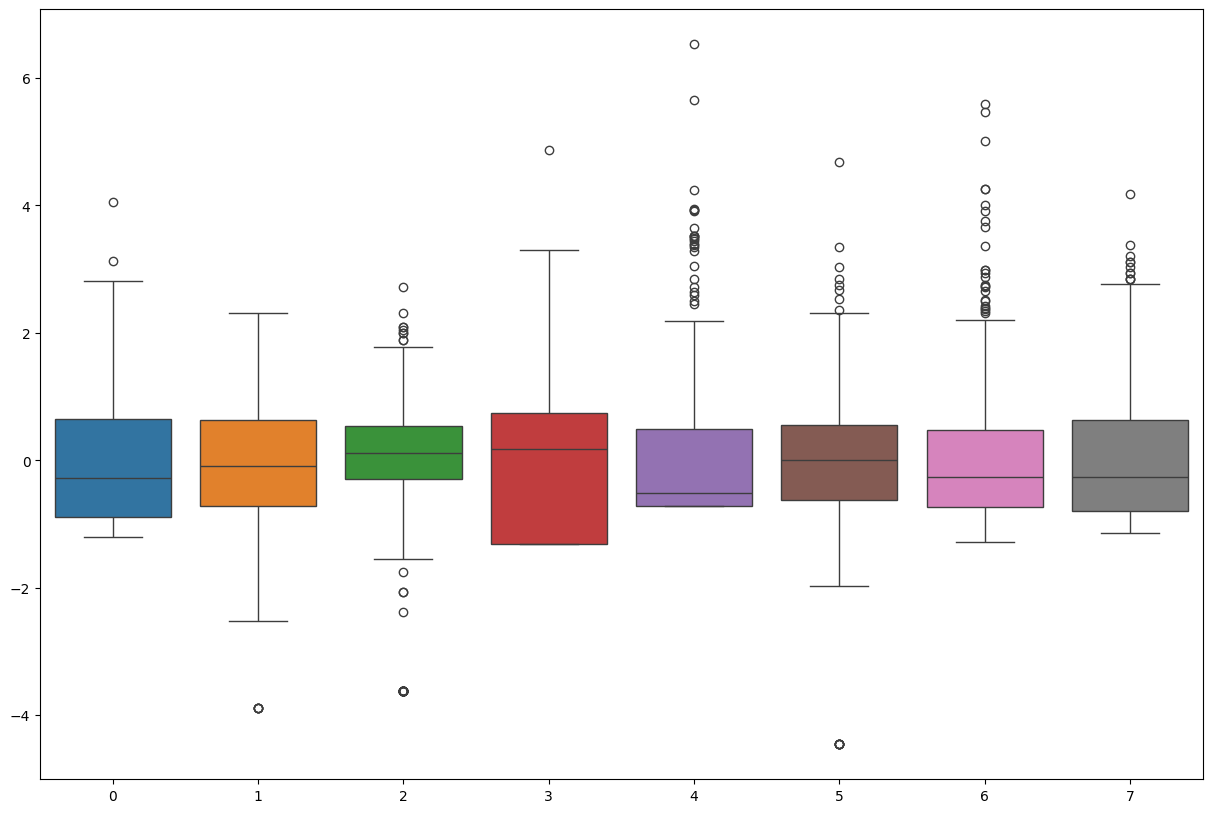

In [ ]:
plt.figure(figsize=(15, 10)) ##after standardisation
sns.boxplot(data=x_train_scaled)
plt.show()

In [ ]:
##Trying to replace the outliers
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)


In [ ]:
def replace_outliers_with_mean(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    mean_value = df[colomn].mean()

    df[column] = df[column].apply(lambda x: mean_value if (x < lower_bound or x > upper_bound) else x)

    return df

colomns = ["Insulin","DiabetesPedigreeFunction"]


for colomn in colomns:
    if colomn in x_train.columns:
        x_train_scaled = replace_outliers_with_mean(x_train_scaled, colomn)
    else:
        print(f"Column '{colomn}' not found in x_train_scaled")

<Axes: >

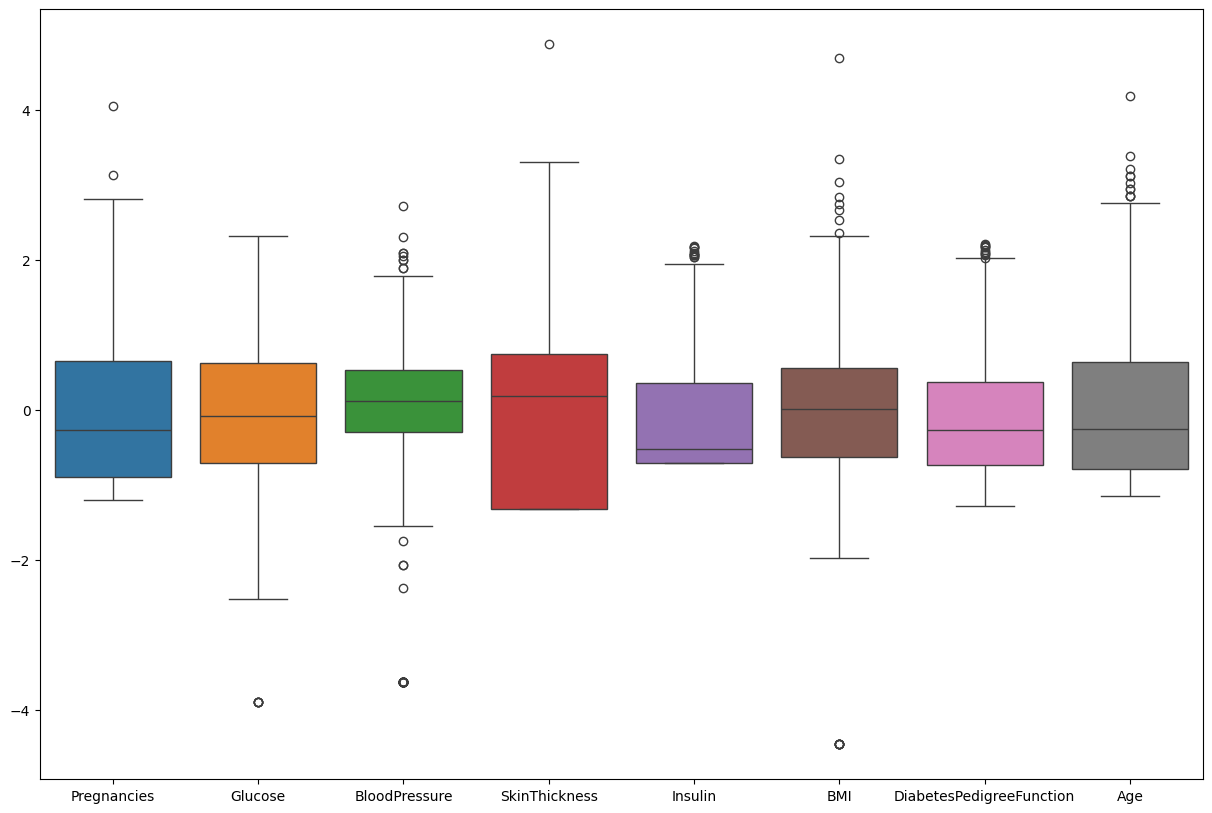

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=x_train_scaled)

In [ ]:
###selecting the required features
x_train_scaled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.091041,0.139946,-0.078959,-0.061925,-0.033620,-0.009470,0.549072
Glucose,0.091041,1.000000,0.123718,0.095407,0.299258,0.244558,0.170958,0.249495
BloodPressure,0.139946,0.123718,1.000000,0.205743,0.123818,0.179056,0.075316,0.236096
SkinThickness,-0.078959,0.095407,0.205743,1.000000,0.491342,0.382993,0.191116,-0.090381
Insulin,-0.061925,0.299258,0.123818,0.491342,1.000000,0.198166,0.245483,-0.031719
BMI,-0.033620,0.244558,0.179056,0.382993,0.198166,1.000000,0.173258,0.007934
DiabetesPedigreeFunction,-0.009470,0.170958,0.075316,0.191116,0.245483,0.173258,1.000000,0.038449
Age,0.549072,0.249495,0.236096,-0.090381,-0.031719,0.007934,0.038449,1.000000


<Axes: >

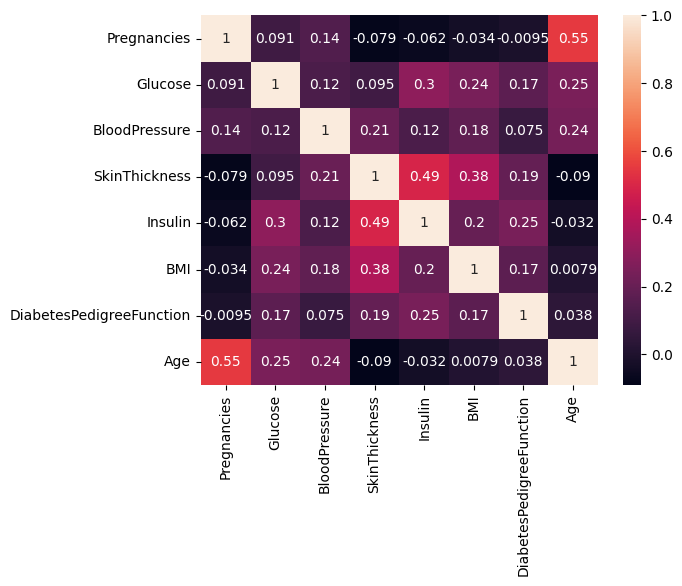

In [ ]:
#visualisation
sns.heatmap(x_train_scaled.corr(), annot=True)

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
correlation(x_train_scaled,0.85) ##there is no features highly correlated

set()

In [ ]:
###Model selection and evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'criterion': ['gini', 'entropy']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Loop for Grid Search using resampled data
for name, mp in models_params.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid.fit(x_train_scaled, y_train)
    print(f"\n{name}")
    print("Best Params:", grid.best_params_)
    print("Train Score: %",round(grid.best_score_*100))
    print("Test Score : %", grid.score(x_test.values,y_test.values)*100)


Logistic Regression
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Score: % 75
Test Score : % 50.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



SVM
Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Train Score: % 81
Test Score : % 49.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



KNN
Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Train Score: % 79
Test Score : % 50.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Decision Tree
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Train Score: % 75
Test Score : % 50.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Random Forest
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Train Score: % 83
Test Score : % 50.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Gradient Boosting
Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Train Score: % 81
Test Score : % 50.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


/tmp/ipython-input-30-4011551112.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=x_train_scaled["SkinThickness"],shade =True)


<Axes: xlabel='SkinThickness', ylabel='Density'>

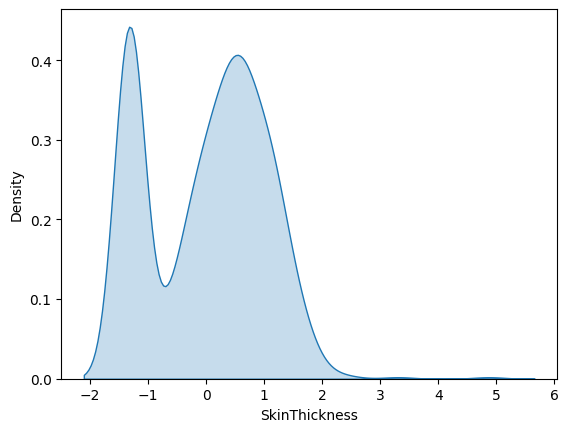

In [ ]:
sns.kdeplot(data=x_train_scaled["SkinThickness"],shade =True)


/tmp/ipython-input-31-3887073024.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=x_train_scaled["Insulin"],shade =True)


<Axes: xlabel='Insulin', ylabel='Density'>

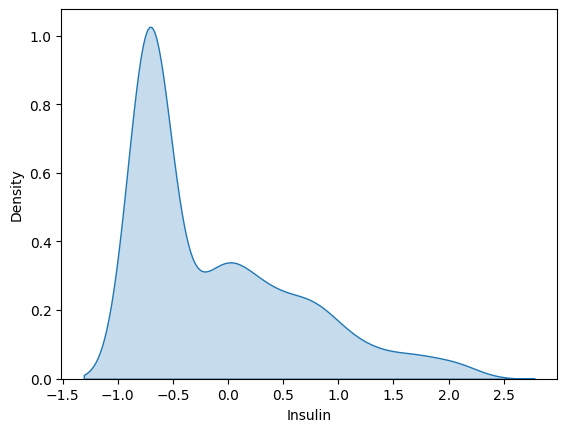

In [ ]:
sns.kdeplot(data=x_train_scaled["Insulin"],shade =True)

In [ ]:
###trying to solve the overfitting issue

In [ ]:
x_train_final = x_train_scaled.copy()
x_train_final = x_train_final.drop(['SkinThickness'], axis=1)

In [ ]:
x_train_final.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.343737,-0.243581,1.159969,-7.151006e-01,0.187476,-0.491433,0.365251
1,0.034760,0.223571,-3.625552,-7.151006e-01,0.024033,-0.598229,-0.965757
2,0.961691,0.535006,1.055936,2.831069e-17,-0.316472,-1.129157,0.808920
3,1.270668,-0.461585,0.327704,-7.151006e-01,-0.670597,-0.796564,2.139927
4,-1.201148,-0.056720,0.015605,-7.151006e-01,-0.678372,-0.657994,0.099049


In [ ]:
###now droping for the test dataset

In [ ]:
x_test_final = pd.DataFrame(x_test_scaled, columns=x.columns)
x_test_final = x_test_final.drop(['SkinThickness'], axis=1)

In [ ]:
x_test_final.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.274217,-0.025577,0.535770,0.398180,0.064894,-0.589075,-0.699555
1,1.270668,-1.863042,0.119638,-0.715101,-0.098549,0.311061,0.720186
2,2.197599,-0.150150,0.535770,0.569454,1.304332,0.875553,1.252589
3,1.888622,1.157876,0.743836,-0.715101,-0.684217,-0.964386,1.784992
4,-0.892171,-0.399298,0.119638,0.792110,0.228336,0.091367,-0.788289


In [ ]:
x_train_final.std().mean() ## getting the expected which is nearby 1

np.float64(0.9346405244430736)

In [ ]:
###trying the models with grid search cv

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_final, y_train)
y_pred = lr.predict(x_test_final)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'criterion': ['gini', 'entropy']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Loop for Grid Search using resampled data
for name, mp in models_params.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid.fit(x_train_final, y_train)
    print(f"\n{name}")
    print("Best Params:", grid.best_params_)
    print("Train Score: %",round(grid.best_score_*100))
    print("Test Score : %", grid.score(x_test_final,y_test.values)*100)


Logistic Regression
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Score: % 74
Test Score : % 76.5

SVM
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Train Score: % 81
Test Score : % 79.0

KNN
Best Params: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Train Score: % 78
Test Score : % 81.0

Decision Tree
Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Train Score: % 75
Test Score : % 71.5

Random Forest
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Train Score: % 82
Test Score : % 82.5

Gradient Boosting
Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Train Score: % 81
Test Score : % 81.5


In [ ]:
#### Here we have knn as the best model
'''
Random Forest
Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Train Score: % 82
Test Score : % 81.5

'''

"\nRandom Forest\nBest Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}\nTrain Score: % 82\nTest Score : % 81.5\n\n"

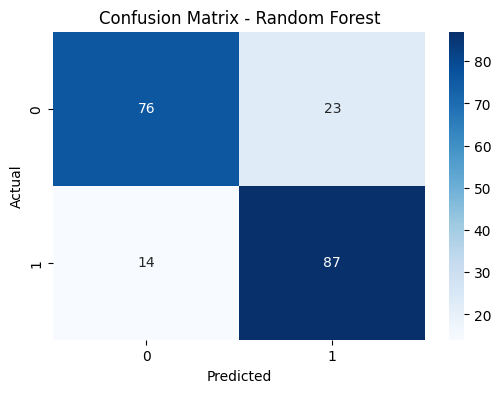

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.79      0.86      0.82       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report



rf_best = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_best.fit(x_train_final, y_train)


y_pred = rf_best.predict(x_test_final)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


print("Classification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
### here we got the expected recall so we dont need to reduce

In [ ]:
###Final prediction with new data

In [ ]:
new_sample = np.array([1.5, -0.5, 0.2, 0.6, 0.4, 0.3, 0.7])

new_sample = new_sample.reshape(1, -1)


prediction = rf_best.predict(new_sample)

print("Prediction:", prediction[0])  # 0 = Non-diabetic, 1 = Diabetic


Prediction: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
